<a href="https://colab.research.google.com/github/mhieu2001/Clustering_Whole_sale/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tải xuống.png to tải xuống.png


In [2]:
import PIL
from PIL import Image
import cv2
import sklearn
from sklearn.cluster import KMeans
import numpy as np

In [3]:
cv2_img = cv2.imread("tải xuống.png")
cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
img = cv2_img.reshape((cv2_img.shape[0] * cv2_img.shape[1], 3))
img.shape

(50460, 3)

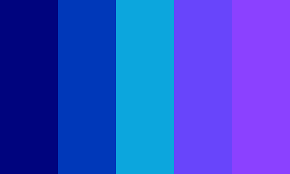

In [4]:
from IPython.display import display
from PIL import Image
new_img_obj = Image.fromarray(cv2_img)
display(new_img_obj)

In [5]:
cluster = KMeans(n_clusters=4, n_init="auto").fit(img)

In [6]:
cluster_centers=cluster.cluster_centers_.astype(np.uint8)
cluster_centers

array([[  0,  55, 185],
       [121,  66, 253],
       [ 11, 166, 221],
       [  0,   3, 125]], dtype=uint8)

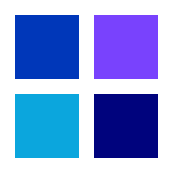

In [7]:
IMG_SIZE = 64
MARGIN = 15
GRID_SIZE = 2

width = IMG_SIZE * GRID_SIZE + MARGIN * (GRID_SIZE + 1)
height = IMG_SIZE * GRID_SIZE + MARGIN * (GRID_SIZE + 1)
tiled_color_img = Image.new(mode='RGB', size=(width, height), color='#ffffff')
for i, rgb_arr in enumerate(cluster_centers):
    color_hex_str = '#%02x%02x%02x' % tuple(rgb_arr)
    color_img = Image.new(
        mode='RGB', size=(IMG_SIZE, IMG_SIZE),
        color=color_hex_str)
    row = i // GRID_SIZE
    col = i % GRID_SIZE
    x_pos = MARGIN + (MARGIN + IMG_SIZE) * col
    y_pos = MARGIN + (MARGIN + IMG_SIZE) * row

    tiled_color_img.paste(im=color_img, box=(x_pos, y_pos))
display(tiled_color_img)

Assignment 2

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
df=df.drop(columns=['Channel','Region'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Here we see that the data's value vary in each feature. Since the K-means is a distance-based algorithm, It requires to scale the data into the same magniture

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [28]:
model = KMeans(n_clusters=3)
model.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Evaluate the how well a dataset was clustered by K-Means by calculate the distance between each data point and its centroid

In [29]:
model.inertia_

1619.952782172457

Visualize the dataset with cluster center

In [23]:
cluster_centers=model.cluster_centers_
cluster_centers

array([[ 0.12656323, -0.37241784, -0.43122186,  0.04312416, -0.42559607,
        -0.12634983],
       [ 1.12931914,  3.80515119,  3.37123923,  1.57377916,  3.28774148,
         2.19858788],
       [-0.50731318,  0.58556291,  0.80971598, -0.3241831 ,  0.80418162,
         0.08314832]])

In [24]:
labels=model.labels_
labels

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,

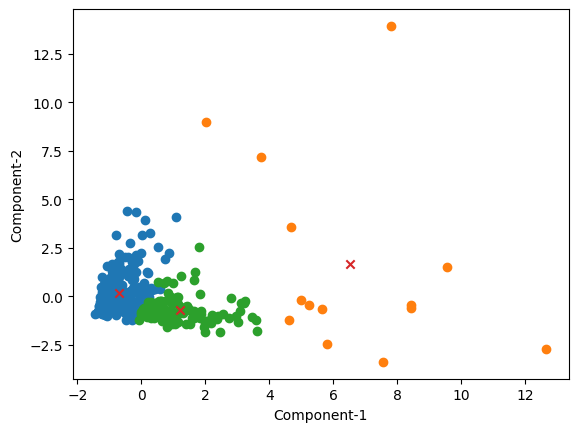

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components=2

model=PCA(n_components=n_components)

# Extract the main components
model=model.fit(scaled_df)

# Transform data to principal components
X_trans=model.transform(scaled_df)

# Transform cluster centers to principal components
cluster_centers_trans=model.transform(cluster_centers)


ig, ax = plt.subplots()

X0 = X_trans[labels==0]
X1 = X_trans[labels==1]
X2 = X_trans[labels==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])
ax.scatter(cluster_centers_trans[:,0],cluster_centers_trans[:,1], marker='x')

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()

Find the optimum value of K
- The best option perform with 5-clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia or SSE')

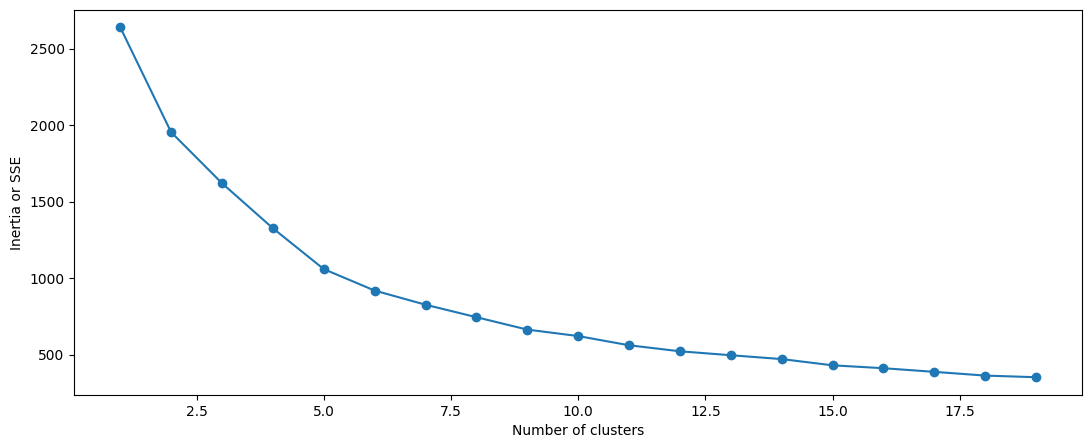

In [30]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model_best = KMeans(n_clusters=cluster)

    model_best.fit(scaled_df)
    sse.append(model_best.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

In [31]:
model_best = KMeans(n_clusters=5)
model_best.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [34]:
print('SSE: ', model_best.inertia_)
print('\nCentroids: \n', model_best.cluster_centers_)

pred = model_best.predict(scaled_df)
df['cluster'] = pred
print('\nCount in each cluster: \n', df['cluster'].value_counts())

SSE:  1059.10880096129

Centroids: 
 [[ 3.13830315e-01  3.92190593e+00  4.27561037e+00 -3.57419457e-03
   4.61816580e+00  5.03365339e-01]
 [ 1.67769625e+00 -1.00208233e-01 -2.43457636e-01  1.11361713e+00
  -4.15501801e-01  2.64263511e-01]
 [-2.27062831e-01 -3.87105990e-01 -4.40489591e-01 -1.63478084e-01
  -4.02331930e-01 -1.97544764e-01]
 [-4.87570193e-01  6.62250035e-01  9.00022862e-01 -3.24212058e-01
   8.88477505e-01  1.51975337e-01]
 [ 1.96681731e+00  5.17550306e+00  1.28721685e+00  6.90059988e+00
  -5.54861977e-01  1.64784475e+01]]

Count in each cluster: 
 cluster
2    268
3     99
1     62
0     10
4      1
Name: count, dtype: int64


Try another model with Gaussian/PCA and Hierarchical clustering

In [43]:
from sklearn.mixture import GaussianMixture

model= GaussianMixture(n_components=5)

model.fit(scaled_df)

GaussianMixture(n_components=5)

In [44]:
labels=model.predict(scaled_df)
labels

array([0, 0, 2, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1,
       4, 4, 2, 0, 1, 1, 2, 1, 0, 0, 1, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 4, 1, 1, 4, 4, 4, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 4,
       1, 1, 1, 1, 2, 4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 4, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 4, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       4, 0, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 4, 1, 1, 2, 1, 1, 4, 0,
       1, 1, 0, 0, 4, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 4, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 4, 4, 1, 0, 0, 4, 4, 0, 1, 1, 0,
       0, 4, 2, 4, 0, 1, 1, 0, 0, 1, 1, 1, 1, 4, 1, 0, 1, 0, 1, 1, 4, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [45]:
means=model.means_
means

array([[-3.57051305e-01,  8.89109692e-02,  1.68888020e-01,
        -3.69372291e-01,  2.18261907e-01, -1.28276825e-01],
       [ 5.61134380e-02, -5.45922464e-01, -5.84421390e-01,
         1.07418214e-02, -5.33177165e-01, -2.40162434e-01],
       [-3.17810724e-01,  1.70573841e+00,  2.06237587e+00,
        -2.62192323e-01,  2.01355523e+00,  4.50008564e-01],
       [ 1.96681731e+00,  5.17550306e+00,  1.28721685e+00,
         6.90059988e+00, -5.54861977e-01,  1.64784475e+01],
       [ 1.22442261e+00,  2.13476197e-01, -1.14687713e-01,
         1.28494543e+00, -3.87727659e-01,  6.10020414e-01]])

In [46]:
cov=model.covariances_
cov

array([[[ 2.76849171e-01, -1.83406770e-02, -1.55542762e-02,
          1.33626965e-02, -5.25637849e-02,  5.00763157e-02],
        [-1.83406770e-02,  2.31085597e-01,  2.10417008e-01,
          1.02110208e-02,  1.91612024e-01,  1.11474706e-02],
        [-1.55542762e-02,  2.10417008e-01,  3.73440849e-01,
          9.43564542e-03,  3.32114250e-01,  1.05749639e-02],
        [ 1.33626965e-02,  1.02110208e-02,  9.43564542e-03,
          5.96851108e-02,  1.36151104e-02,  5.25998972e-03],
        [-5.25637849e-02,  1.91612024e-01,  3.32114250e-01,
          1.36151104e-02,  3.87125882e-01, -3.29906702e-03],
        [ 5.00763157e-02,  1.11474706e-02,  1.05749639e-02,
          5.25998972e-03, -3.29906702e-03,  9.79320522e-02]],

       [[ 6.63177048e-01,  2.07739524e-02,  1.20415761e-02,
          6.85397188e-02,  7.68854331e-03,  6.56404763e-02],
        [ 2.07739524e-02,  2.28495671e-02,  9.44926541e-03,
          2.67046296e-02,  3.04505760e-03,  1.55716799e-02],
        [ 1.20415761e-02,  9.4

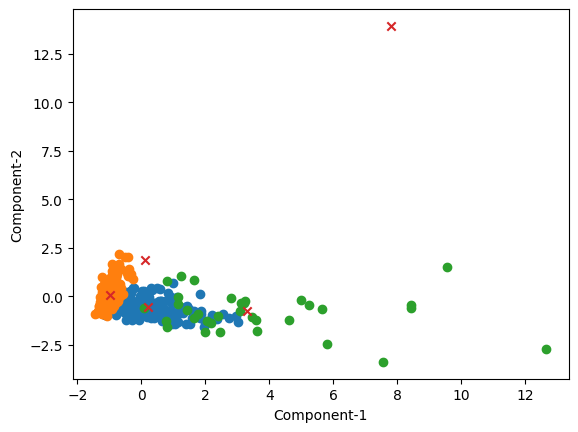

In [47]:
n_components=2

model=PCA(n_components=n_components)

# Extract the main components
model=model.fit(scaled_df)

# Transform data to principal components
X_trans=model.transform(scaled_df)

# Transform cluster centers to principal components
cluster_centers_trans=model.transform(means)


ig, ax = plt.subplots()

X0 = X_trans[labels==0]
X1 = X_trans[labels==1]
X2 = X_trans[labels==2]
ax.scatter(X0[:, 0], X0[:, 1])
ax.scatter(X1[:, 0], X1[:, 1])
ax.scatter(X2[:, 0], X2[:, 1])
ax.scatter(cluster_centers_trans[:,0],cluster_centers_trans[:,1], marker='x')

ax.set_xlabel("Component-1")
ax.set_ylabel("Component-2")

plt.show()

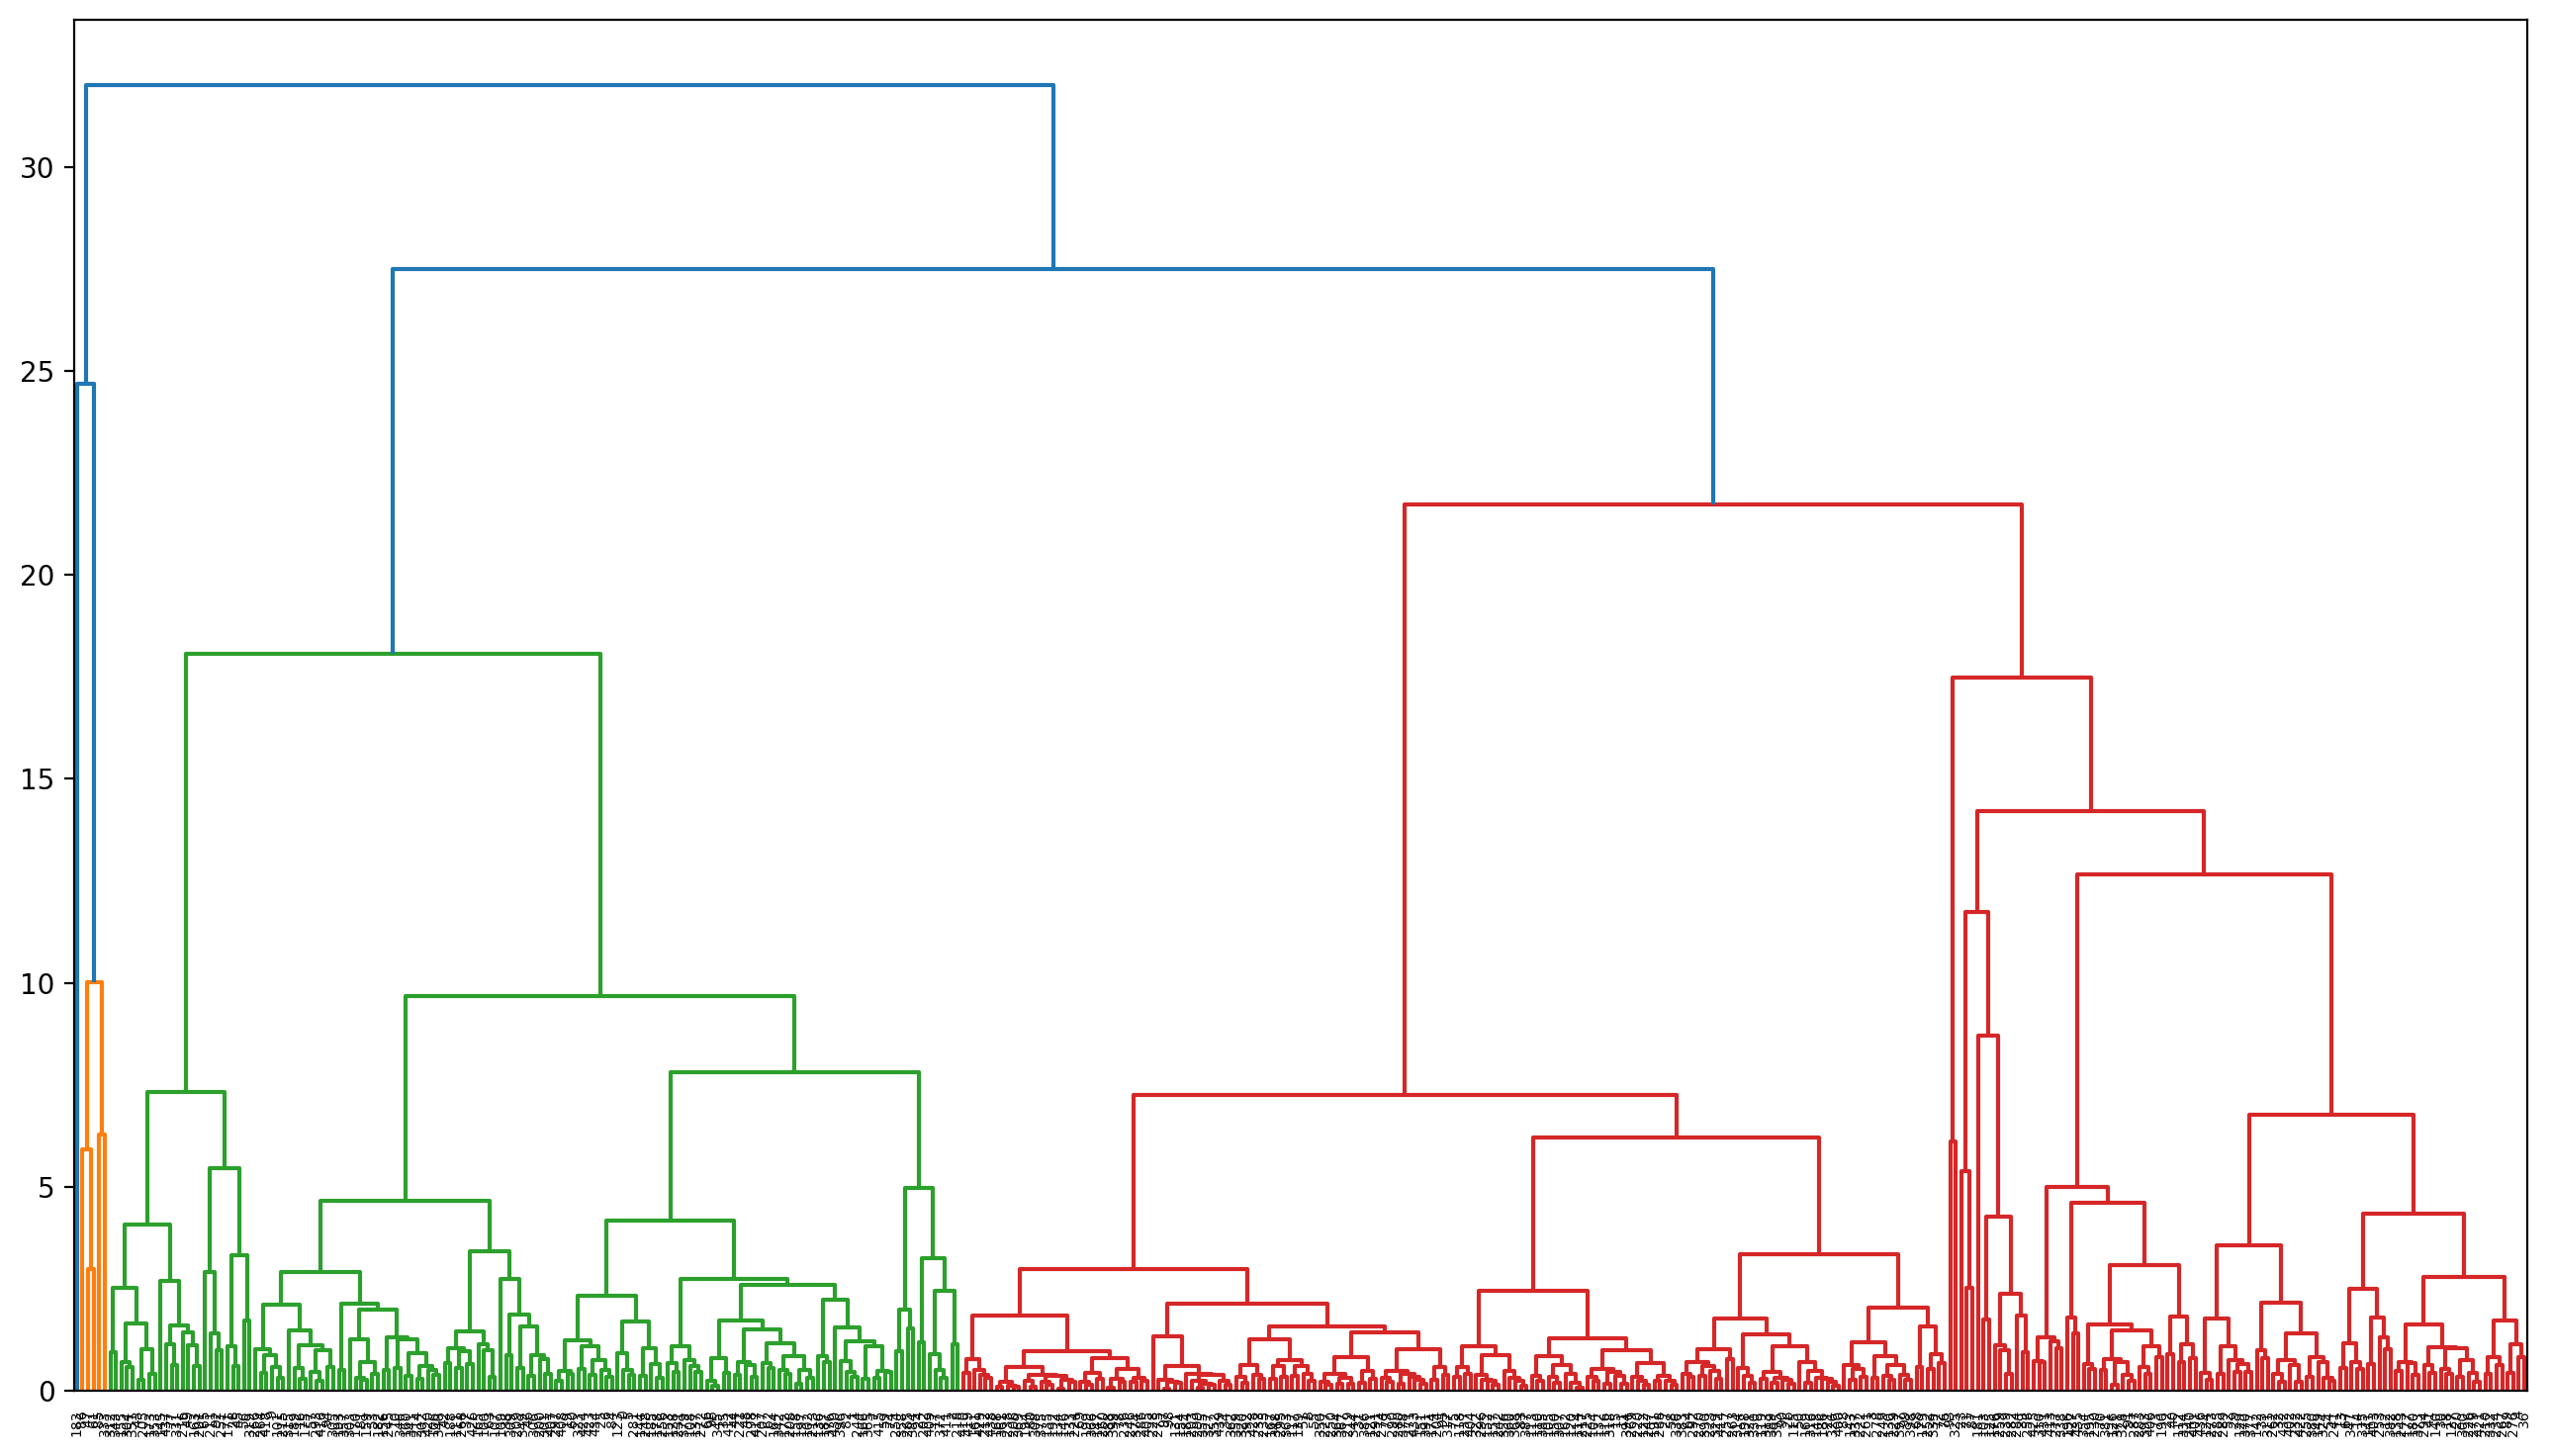

[3 3 3 4 4 3 3 3 4 3 3 4 4 4 4 4 3 3 4 3 4 4 4 4 3 3 4 4 3 4 4 4 4 4 4 3 4
 3 3 4 4 4 3 3 3 3 3 1 3 3 4 4 4 3 4 4 3 3 4 3 3 1 3 3 4 3 3 4 4 4 4 4 4 4
 3 4 4 3 4 4 4 3 3 4 3 1 1 4 4 4 4 4 3 4 3 4 3 4 4 4 3 3 3 4 4 4 3 3 3 3 4
 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 3 3 4 4
 4 4 4 4 4 3 4 3 3 4 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 3 4 3 4 4 3 4 4 4 3 2 4
 3 4 3 3 3 4 4 4 3 4 4 4 3 4 4 3 3 3 4 4 3 4 3 3 3 4 3 4 3 3 3 3 4 3 4 4 3
 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 3 4 4 3 4 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4
 4 3 3 4 4 3 3 3 3 3 3 4 4 3 4 4 3 4 4 3 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 3 4
 1 4 4 4 4 4 4 3 3 3 3 4 3 3 4 4 3 4 3 4 3 4 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4
 4 4 3 4 4 4 3 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4
 3 3 3 4 3 3 4 4 3 3 3 3 4 3 4 4 3 3 4 3 4 4 4 3 4 4 4 3 4 4 3 4 4]


In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Hierarchical clustering
# Ward's method Euclidean distance
# Ward's method: a method for merging two clusters so that the sum of squares within the clusters is minimized
linkage_result = linkage(scaled_df, method='ward', metric='euclidean')
# Determine clustering thresholds
threshold = 0.7 * np.max(linkage_result[:, 2])

# Visualization of hierarchical clustering
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, color_threshold=threshold)
plt.show()

# Get the value of the clustering result
clustered = fcluster(linkage_result, threshold, criterion='distance')
print(clustered)